In [6]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

from neurolib.models.wc import WCModel
import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [2]:
mat = scipy.io.loadmat('Individual_Connectomes.mat',simplify_cells=True,squeeze_me=True,chars_as_strings=True)
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'connMatrices'])


In [3]:
print(mat['connMatrices'].keys())

dict_keys(['SC', 'FC'])


In [4]:
for i in range(0, 5):
    print("i:", i, "matrix shape:", mat['connMatrices']['SC'][i].shape)

i: 0 matrix shape: (68, 68, 70)
i: 1 matrix shape: (114, 114, 70)
i: 2 matrix shape: (219, 219, 70)
i: 3 matrix shape: (448, 448, 70)
i: 4 matrix shape: (1000, 1000, 70)


In [5]:
for i in range(0, 5):
    print("i:", i, "matrix shape:", mat['connMatrices']['FC'][i].shape)

i: 0 matrix shape: (68, 68, 70)
i: 1 matrix shape: (114, 114, 70)
i: 2 matrix shape: (219, 219, 70)
i: 3 matrix shape: (448, 448, 70)
i: 4 matrix shape: (1000, 1000, 70)


In [24]:
mat['connMatrices']['FC'][2][:, :, 0].shape

(219, 219)

In [26]:
# model = WCModel(Cmat = mat['LauConsensus']['Matrices'][2][0], Dmat = mat['LauConsensus']['Matrices'][2][1])

def normalize_matrix(matrix):
    min_in_matrix = float('inf')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] < min_in_matrix:
                min_in_matrix = matrix[i][j]
    
    matrix = matrix - min_in_matrix
    
    max_in_matrix = float('-inf')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] > max_in_matrix:
                max_in_matrix = matrix[i][j]
                # print("found max", max_in_matrix)
    result = matrix / max_in_matrix
    print("normalize check", np.min(result), np.max(result))
    return result

model = WCModel(Cmat = normalize_matrix(mat['connMatrices']['FC'][2][:, :, 0]), Dmat = np.zeros(mat['connMatrices']['FC'][2][:, :, 0].shape))

normalize check 0.0 1.0


In [28]:
# DOUBT THERE ARE NAN VALUES IN THE MATRIX

np.isnan(np.sum(mat['connMatrices']['FC'][2][0]))

True

In [29]:
# TODO: replace these parameters with the best parameters of the 02_mean_connectome
model.params['exc_ext'] = 0.65
model.params['signalV'] = 0
model.params['duration'] = 20 * 1000 
model.params['sigma_ou'] = 0.14
model.params['K_gl'] = 3.15


model.run(chunkwise=True)

(0.0, 200.0)

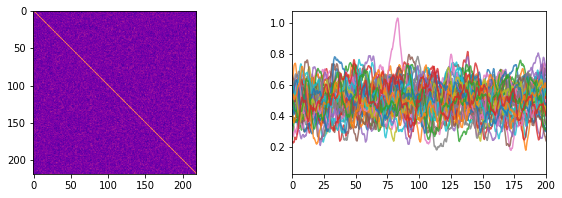

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(model.exc[:, -10000:]))
axs[1].plot(model.t, model.exc[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)

In [31]:
func.fc(model.exc[:, -10000:]).shape

(219, 219)

In [33]:
score = func.matrix_correlation(func.fc(model.exc[:, -10000:]), mat['connMatrices']['FC'][2][:, :, 0])
print("Mean FC/FC correlation: {:.2f}".format(score))

Mean FC/FC correlation: -0.00
